# Analysis of Unemployment in Pakistan (2000–2023)

This notebook analyzes the unemployment rate in Pakistan using socio-economic indicators from 2000 to 2023.  
The objective is to identify unemployment trends, with special attention to the Covid-19 period, and explore possible factors that correlate with changes in unemployment.


In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset
file_path = "Pakistan_Poverty_Dataset_2000_2023.csv"
data = pd.read_csv(file_path)

In [9]:
# Display basic info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   24 non-null     int64  
 1   Population (millions)                  24 non-null     float64
 2   GDP Growth Rate (%)                    24 non-null     float64
 3   Inflation Rate (%)                     24 non-null     float64
 4   Unemployment Rate (%)                  24 non-null     float64
 5   Poverty Headcount Ratio (%)            24 non-null     float64
 6   Agriculture Growth Rate (%)            24 non-null     float64
 7   Government Social Spending (% of GDP)  24 non-null     float64
 8   External Debt (USD billions)           24 non-null     float64
 9   Climate Disasters (count)              24 non-null     int64  
dtypes: float64(8), int64(2)
memory usage: 2.0 KB


,Year,Population (millions),GDP Growth Rate (%),Inflation Rate (%),Unemployment Rate (%),Poverty Headcount Ratio (%),Agriculture Growth Rate (%),Government Social Spending (% of GDP),External Debt (USD billions),Climate Disasters (count)
0,2000,138.0,4.2,3.6,6.0,34.7,2.5,3.0,55.0,2
1,2001,140.5,3.1,4.4,6.2,33.5,2.0,3.1,57.0,1
2,2002,143.0,3.7,3.5,6.1,32.1,4.1,3.2,58.5,1
3,2003,145.5,5.0,3.1,5.8,30.2,4.5,3.3,59.0,0
4,2004,148.0,6.4,7.4,5.5,28.6,6.0,3.5,60.0,1


## Data Overview

The dataset contains yearly data for Pakistan covering population, GDP growth, inflation, unemployment rate, poverty ratio, agriculture growth, government spending, debt, and climate disasters.  
The key variable of interest here is **Unemployment Rate (%)**.


In [10]:
# Check for missing values
data.isnull().sum()

Year                                     0
Population (millions)                    0
GDP Growth Rate (%)                      0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Poverty Headcount Ratio (%)              0
Agriculture Growth Rate (%)              0
Government Social Spending (% of GDP)    0
External Debt (USD billions)             0
Climate Disasters (count)                0
dtype: int64

In [13]:
# Basic statistics of unemployment
data["Unemployment Rate (%)"].describe()

count    24.00000
mean      5.80000
std       0.36831
min       5.20000
25%       5.50000
50%       5.80000
75%       6.02500
max       6.50000
Name: Unemployment Rate (%), dtype: float64

## Unemployment Trend Over Time

We first visualize how the unemployment rate changed between 2000 and 2023. This will help us identify overall trends and highlight the impact of Covid-19 years.


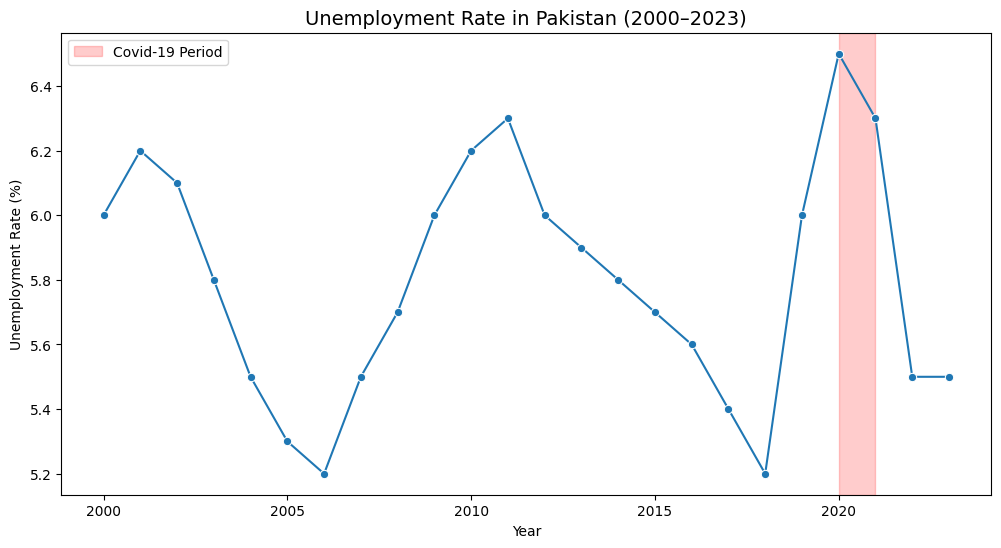

In [14]:
# Plot unemployment trend
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Unemployment Rate (%)", data=data, marker="o")
plt.axvspan(2020, 2021, color="red", alpha=0.2, label="Covid-19 Period")
plt.title("Unemployment Rate in Pakistan (2000–2023)", fontsize=14)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.legend()
plt.show()

The shaded area highlights the Covid-19 years (2020–2021), during which the unemployment rate shows a noticeable increase.

## Relationship with Other Economic Indicators

Unemployment can be influenced by GDP growth, inflation, poverty, and government social spending.  
We visualize correlations to understand which factors are most related to unemployment.


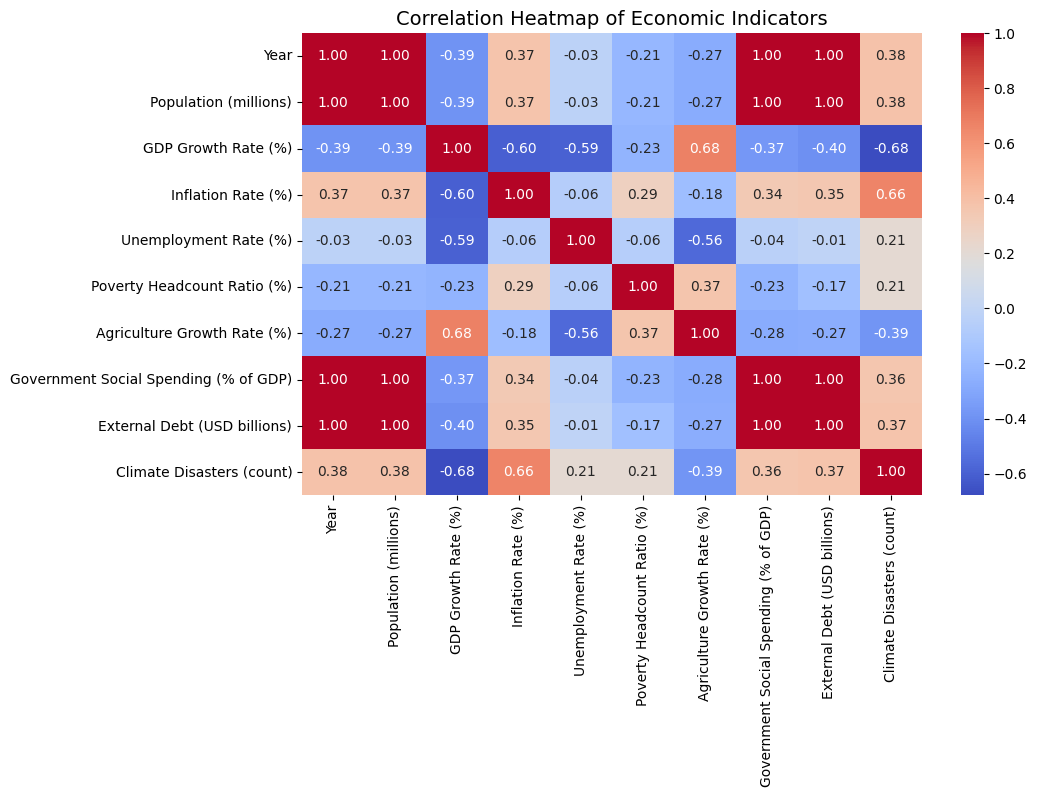

In [15]:
# Correlation heatmap
plt.figure(figsize=(10,6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Economic Indicators", fontsize=14)
plt.show()


The correlation heatmap shows which variables move together with unemployment.  
A negative correlation with **GDP Growth Rate** indicates that when GDP growth is high, unemployment tends to decrease.  
Positive correlation with **Poverty Headcount Ratio** suggests higher unemployment is linked with higher poverty.


## Insights

1. **Trend:** Unemployment rate has fluctuated between 5% and 7% for most years, but a sharp rise occurred during 2020–2021 due to Covid-19.  
2. **Economic Impact:** Periods of strong GDP growth are generally associated with lower unemployment.  
3. **Poverty Link:** Higher unemployment rates correspond with higher poverty ratios, showing their interdependence.  
4. **Policy Implication:** Increased government social spending during crises could help offset unemployment effects.


## Final Summary Visualization

To better understand unemployment in relation to the economy, we compare it with GDP growth and poverty ratio.  
These plots provide a clearer picture of how economic performance and poverty levels align with unemployment trends.


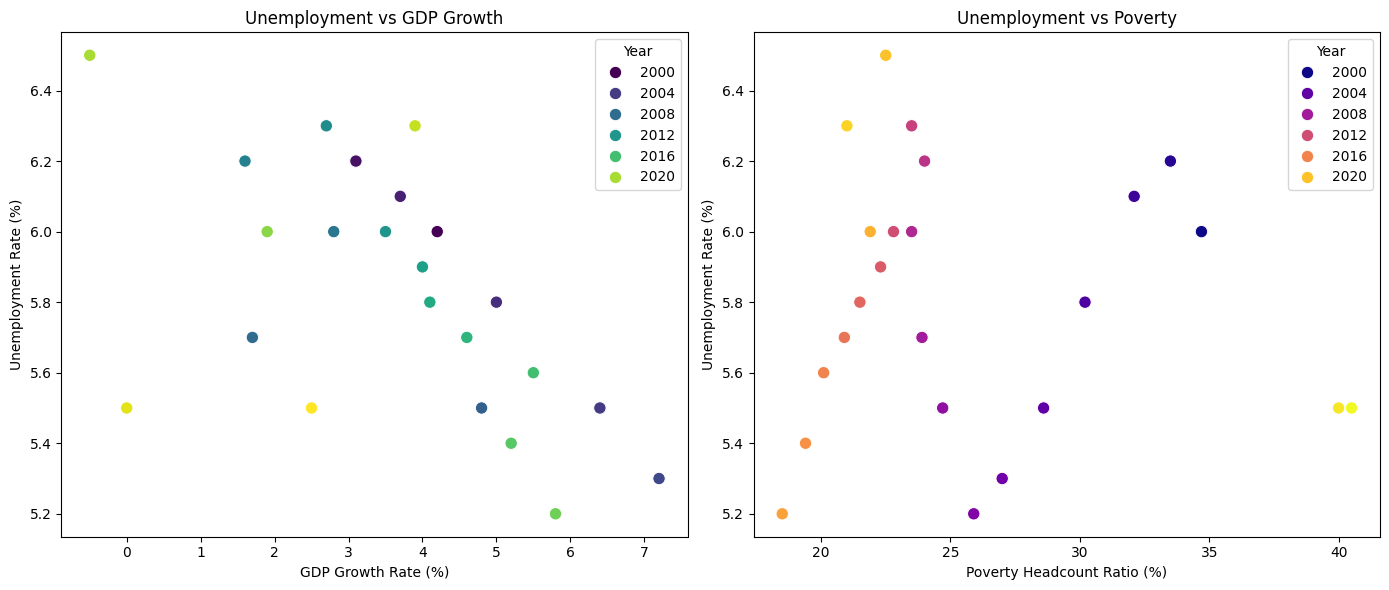

In [16]:
# Side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Unemployment vs GDP Growth
sns.scatterplot(ax=axes[0], x="GDP Growth Rate (%)", y="Unemployment Rate (%)", data=data, hue="Year", palette="viridis", s=80)
axes[0].set_title("Unemployment vs GDP Growth", fontsize=12)
axes[0].set_xlabel("GDP Growth Rate (%)")
axes[0].set_ylabel("Unemployment Rate (%)")

# Unemployment vs Poverty
sns.scatterplot(ax=axes[1], x="Poverty Headcount Ratio (%)", y="Unemployment Rate (%)", data=data, hue="Year", palette="plasma", s=80)
axes[1].set_title("Unemployment vs Poverty", fontsize=12)
axes[1].set_xlabel("Poverty Headcount Ratio (%)")
axes[1].set_ylabel("Unemployment Rate (%)")

plt.tight_layout()
plt.show()


### Interpretation of Plots
- **Unemployment vs GDP Growth:** Years with higher GDP growth generally show lower unemployment, confirming the inverse relationship.  
- **Unemployment vs Poverty:** Higher unemployment tends to align with higher poverty ratios, emphasizing the socioeconomic impact.  

These relationships strengthen the conclusion that economic growth and poverty reduction are closely tied to employment trends.
